In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import seaborn as sns
import warnings

In [64]:
df= read_csv('fuelprices.csv', skiprows = 5, delimiter = ';', index_col = 0, parse_dates=True, infer_datetime_format=True)

data = df.dropna().rename({'euro/liter':'Euro95','euro/liter.1':'Diesel', 'euro/liter.2':'LPG' }, axis=1)

data.index.names = ['Months']

data.index = pd.to_datetime(data.index)

warnings.filterwarnings("ignore", message="The argument 'infer_datetime_format' is deprecated.*", category=FutureWarning) #ignore warning

data['Average'] = data.mean(axis=1) #Add Average price 
data


,Euro95,Diesel,LPG,Average
Months,,,,
2018-01-01,1.589,1.292,0.696,1.192333
2018-02-01,1.566,1.254,0.667,1.162333
2018-03-01,1.545,1.260,0.654,1.153000
2018-04-01,1.608,1.301,0.663,1.190667
2018-05-01,1.668,1.360,0.675,1.234333
2018-06-01,1.660,1.362,0.681,1.234333
2018-07-01,1.661,1.356,0.688,1.235000
2018-08-01,1.683,1.359,0.692,1.244667
2018-09-01,1.680,1.384,0.714,1.259333


Text(0.5, 1.0, 'Fuel prices per month')

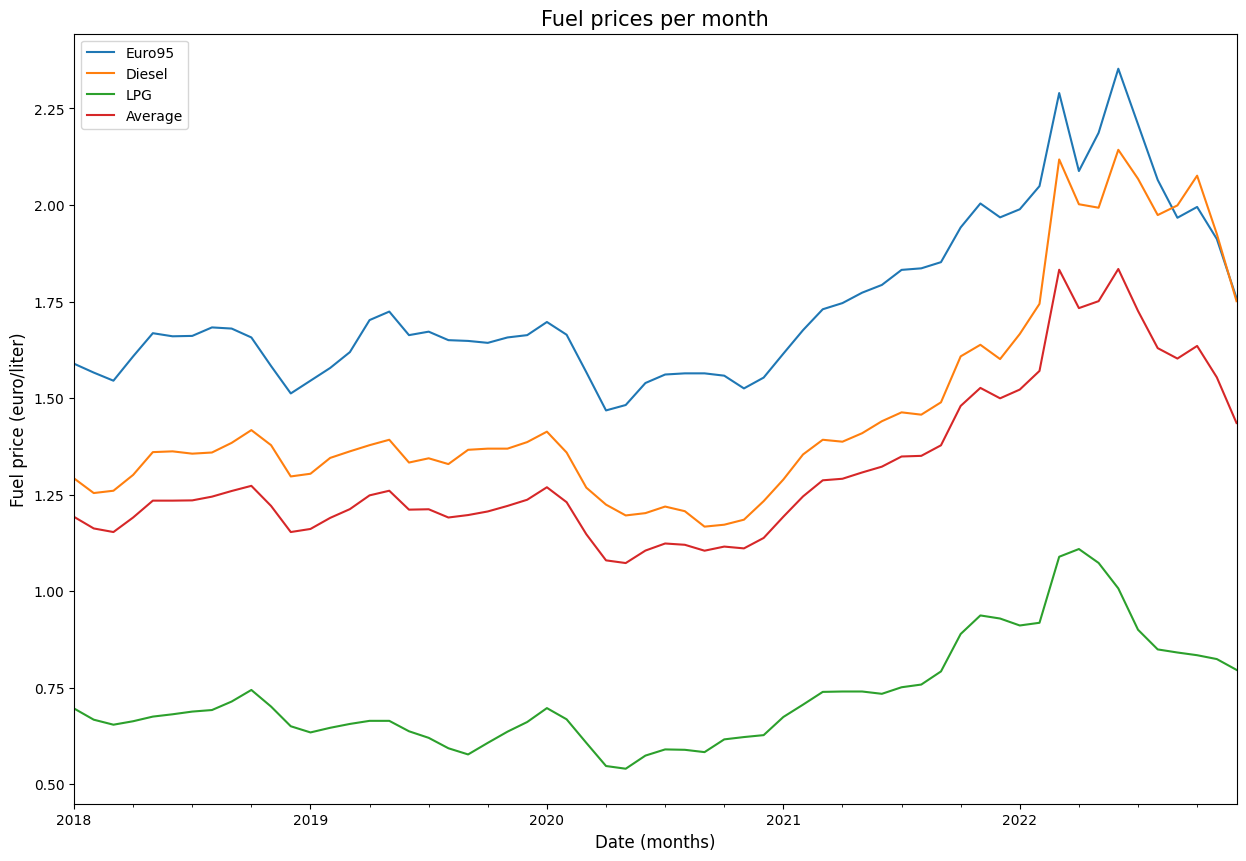

In [65]:
data.plot(figsize=(15,10))
plt.ylabel('Fuel price (euro/liter)', fontsize=12)
plt.xlabel('Date (months)', fontsize=12)
plt.title('Fuel prices per month', fontsize=15)

In [66]:
data_yearly = data.resample('Y').mean() 
data_yearly['Average'] = data_yearly.mean(axis=1)
data.index.names = ['Year']
data_yearly['Year'] = data_yearly.index.strftime('%Y')
data_yearly = data_yearly.set_index('Year')
data_yearly.reset_index(level=0, inplace=True)
data_yearly


,Year,Euro95,Diesel,LPG,Average
0,2018,1.617667,1.335000,0.685417,1.212694
1,2019,1.647000,1.356417,0.632917,1.212111
2,2020,1.561833,1.237083,0.605000,1.134639
3,2021,1.813917,1.460583,0.782417,1.352306
4,2022,2.071917,1.954917,0.929250,1.652028


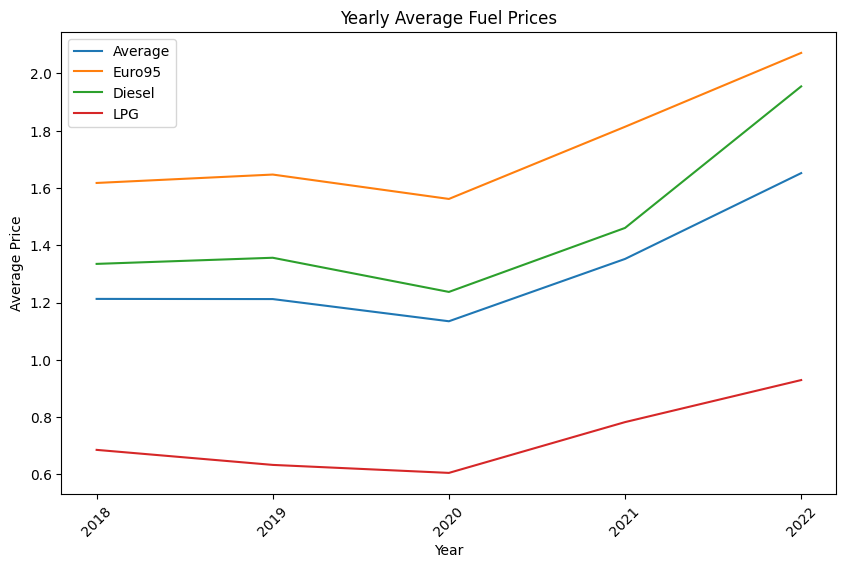

In [71]:

fueltypes = ["Year", "Euro95", "Diesel", "LPG", "Average"]

plt.figure(figsize=(10, 6)) 

sns.lineplot(x='Year', y='Average', data=data_yearly, label='Average')
sns.lineplot(x='Year', y='Euro95', data=data_yearly, label='Euro95')
sns.lineplot(x='Year', y='Diesel', data=data_yearly, label='Diesel')
sns.lineplot(x='Year', y='LPG', data=data_yearly, label='LPG')

plt.title('Yearly Average Fuel Prices')
plt.xlabel('Year')
plt.ylabel('Average Price')

plt.xticks(rotation=45)

plt.legend() 

plt.show()


In [13]:
mobility_trips = read_csv('mobility_perday.csv', index_col = 1, skiprows = 6, delimiter = ';', usecols = [0,1,2,3,4,5,6])
mobility_trips = mobility_trips.dropna()
mobility_trips = mobility_trips.drop('Travel modes')
mobility_trips = mobility_trips.rename({'Unnamed: 0':'motive'}, axis=1)
display(mobility_trips.head())



In [ ]:
#The average amount of trips per day for every vehicle combined in 2022
year = '2022'

mobility_trips_total = mobility_trips[mobility_trips.index=="Total"]
mobility_trips_motive = mobility_trips_total.set_index(['motive']).sort_values(year)
fig = px.bar(mobility_trips_motive.sort_values(year), x=year, y=mobility_trips_motive.sort_values(year).index, 
             orientation='h', color = mobility_trips_motive.sort_values(year).index, )
fig.update_layout(title={
    'text': f'Average amount of trips per day for every vehicle combined in {year}',
    'x': 0.5
}, xaxis_range=[0, 5])
fig.show()

In [ ]:
years = ['2018', '2019', '2020', '2021', '2022']
mobility_trips_years = mobility_trips_motive[years]


# Melt the data to create a 'year' column
mobility_trips_years = mobility_trips_years.reset_index().melt(id_vars=['motive'], var_name='year', value_name='trips')

fig = px.bar(mobility_trips_years, x='trips', y='motive', color='motive', facet_col='year', orientation='h', hover_name='trips')

fig.update_layout(title={
    'text': 'Average amount of trips for every vehicle combined per day from 2018 to 2022',
    'x': 0.5
})
fig.update_yaxes(title_text="Travel motives")
fig.show()

In [29]:
mobility_dist = read_csv('mobility_perday.csv', index_col = 1, skiprows = 6, delimiter = ';', usecols = [0,1,7,8,9,10,11])
mobility_dist = mobility_dist.dropna()
mobility_dist = mobility_dist.drop('Travel modes')
mobility_dist = mobility_dist.rename({'Unnamed: 0':'motive', '2018.1':'2018',  '2019.1':'2019', '2020.1':'2020', '2021.1':'2021', '2022.1':'2022'}, axis=1)
display(mobility_dist)

,motive,2018,2019,2020,2021,2022
Periods,,,,,,
Total,Total,36.16,36.00,24.88,27.24,30.21
Passenger car (driver),Total,18.16,18.02,13.14,14.05,15.13
Train,Total,3.88,4.08,1.60,1.67,2.62
Bike,Total,3.16,3.01,2.61,2.68,3.04
Walking,Total,0.90,0.88,1.12,1.38,1.21
Total,"Travel to/from work, (non)-daily commute",10.55,9.72,6.16,6.13,7.40
Passenger car (driver),"Travel to/from work, (non)-daily commute",6.79,6.20,4.37,4.33,4.90
Train,"Travel to/from work, (non)-daily commute",1.33,1.35,0.50,0.36,0.71
Bike,"Travel to/from work, (non)-daily commute",0.68,0.65,0.44,0.45,0.55


In [52]:
# # Melt the dataframe to create a suitable format for Plotly Express
# melted_df = mobility_dist.melt(id_vars=['motive'], var_name='Year', value_name='Count')

# # Filter for the 'work' motive and the years 2018 to 2022
# work_df = melted_df[(melted_df['motive'] == 'Travel to/from work, (non)-daily commute') & (melted_df['Year'].isin(['2018', '2019', '2020', '2021', '2022']))]

# # Create a bar chart using Plotly Express
# fig = px.bar(work_df, x='Year', y='Count', color='motive', title='Travel Methods for Work Motive (2018-2022)')
# fig.show()

C:\Users\irene\AppData\Local\Temp\ipykernel_15536\1301853829.py:1: FutureWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\irene\AppData\Local\Temp\ipykernel_15536\1301853829.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



,Months,2019,2020,2021,2022
0,jan,4.8,4.6,2.6,3.2
1,feb,4.5,4.3,2.3,3.4
2,mrt,4.6,3.7,3.2,4.5
3,apr,4.9,1.9,3.0,3.4
4,mei,5.1,2.3,2.8,3.8
5,jun,4.3,3.0,3.2,3.8
6,jul,4.9,3.0,3.3,3.3
7,aug,4.1,2.6,2.6,3.2
8,sep,4.7,3.2,3.5,3.9
9,okt,5.4,3.0,3.4,3.9


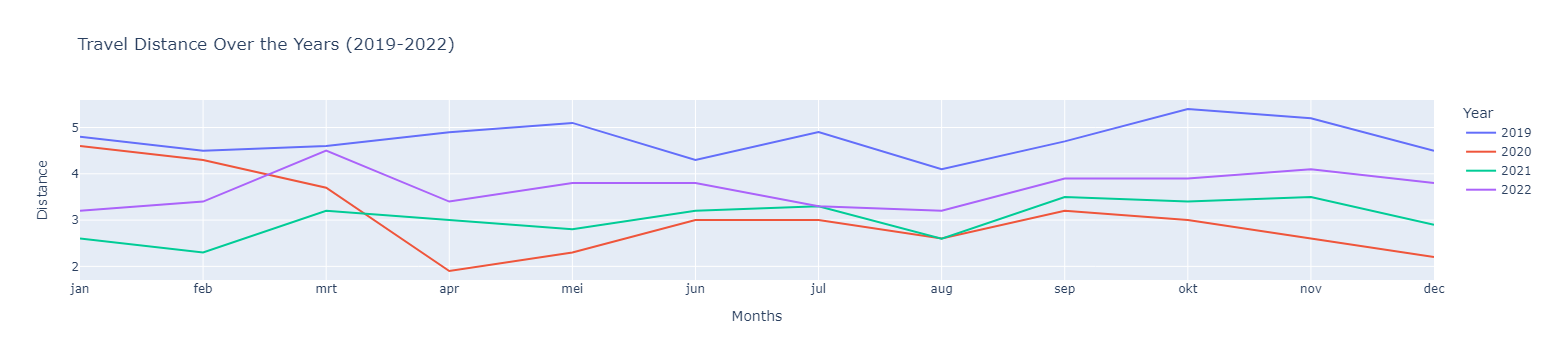

In [63]:
travel_distance_work = read_csv('traveldistance_work.csv', delimiter = '; ', parse_dates=True, infer_datetime_format=True)
travel_distance_work = travel_distance_work.replace({'"': ''}, regex=True)
travel_distance_work = travel_distance_work.rename({'"maand':'Months',  
            '2019 (Mld km)':'2019', '2020 (Mld km)':'2020', '2021 (Mld km)':'2021', '2022 (Mld km)"':'2022'}, axis=1)
display(travel_distance_work)

# Melt the DataFrame to create a suitable format for Plotly Express
melted_df = travel_distance_work.melt(id_vars='Months', var_name='Year', value_name='Distance')

# Create a line plot using Plotly Express with a single line for all years
fig = px.line(melted_df, x='Months', y='Distance', color='Year', title='Travel Distance Over the Years (2019-2022)')
fig.show();